### 6.COMPARING STOCK PRICES
Write a program that compares the stock prices of APPLE, GOOGLE, MICROSOFT, and AMAZON. The program should retrieve the current stock prices of each company and calculate the percentage change in stock prices over a specified period. The program should display the percentage change in stock prices for each company and identify which company's stocks are performing the best.
Additionally, the program should retrieve historical stock prices for each company and analyze any trends or patterns in the data.

Note: Use pandas
_datareader library to
load the dataset of given companies

In [3]:
import pandas as pd 
import numpy as np

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
from pandas_datareader import data as dr

In [5]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
yf.pdr_override()

In [7]:
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

In [8]:
tech_list = ['TSLA','AAPL', 'GOOG', 'MSFT', 'AMZN'] # You can choose any company of your choice

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
   

company_list = [TSLA,AAPL, GOOG, MSFT, AMZN]
company_name = ["TESLA","APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
   
df = pd.concat(company_list, axis=0)

df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2020-07-30,99.199997,100.882668,98.066666,99.166000,99.166000,114315000,TESLA
2020-07-31,101.000000,101.136665,94.732002,95.384003,95.384003,183123000,TESLA
2020-08-03,96.613335,100.653999,96.292000,99.000000,99.000000,132139500,TESLA
2020-08-04,99.667336,101.827332,97.466667,99.133331,99.133331,126225000,TESLA
2020-08-05,99.532669,99.989334,97.887337,99.001335,99.001335,74217000,TESLA


In [9]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [10]:
df = pd.concat(company_list, axis=0)

df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2020-07-30,99.199997,100.882668,98.066666,99.166000,99.166000,114315000,TESLA
2020-07-31,101.000000,101.136665,94.732002,95.384003,95.384003,183123000,TESLA
2020-08-03,96.613335,100.653999,96.292000,99.000000,99.000000,132139500,TESLA
2020-08-04,99.667336,101.827332,97.466667,99.133331,99.133331,126225000,TESLA
2020-08-05,99.532669,99.989334,97.887337,99.001335,99.001335,74217000,TESLA


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3770 entries, 2020-07-30 to 2023-07-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3770 non-null   float64
 1   High          3770 non-null   float64
 2   Low           3770 non-null   float64
 3   Close         3770 non-null   float64
 4   Adj Close     3770 non-null   float64
 5   Volume        3770 non-null   int64  
 6   company_name  3770 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 235.6+ KB


In [12]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

### revenue_by_company

In [13]:
df['Total']= df['Volume'] * df['Open']
revenue_by_company= df.groupby('company_name')['Total'].sum().sort_values(ascending=False)
print(revenue_by_company)

company_name
TESLA        1.800761e+13
APPLE        9.911933e+12
AMAZON       7.818416e+12
MICROSOFT    5.894435e+12
GOOGLE       2.360799e+12
Name: Total, dtype: float64


### market_cap_by_company

In [14]:
market_cap_by_company=df.groupby('company_name')['Volume'].sum() * df.groupby("company_name")['Adj Close'].sum()
market_cap_by_company= market_cap_by_company.sort_values(ascending=False)
print(market_cap_by_company)

company_name
TESLA        1.463460e+16
APPLE        7.636888e+15
AMAZON       5.893470e+15
MICROSOFT    4.404879e+15
GOOGLE       1.819984e+15
dtype: float64


### earning_per_share

In [15]:
df['total']= (df['Close']- df['Open']) * df['Volume']
df.head()

per_share= df.groupby("company_name")['total'].sum() / df.groupby("company_name")['Volume'].sum()
per_share= per_share.sort_values(ascending=False)
per_share

company_name
TESLA        0.174259
APPLE        0.074625
MICROSOFT    0.037511
GOOGLE       0.009391
AMAZON      -0.151039
dtype: float64

### percentage change in stock prices for each company

In [16]:
list1= ["TESLA","APPLE","MICROSOFT","AMAZON","GOOGLE"]
for company in list1:
    df_name= f"df_{company}"
    df_new= df[df["company_name"]== company]
    
    globals()[df_name]= df_new
    
    print(df_name)
    print(df_new)
    print(f"change in stock price in company {df_name} is {df_new['Open'].iloc[-1] - df_new['Open'].iloc[0]}" )

df_TESLA
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-07-30   99.199997  100.882668   98.066666   99.166000   99.166000   
2020-07-31  101.000000  101.136665   94.732002   95.384003   95.384003   
2020-08-03   96.613335  100.653999   96.292000   99.000000   99.000000   
2020-08-04   99.667336  101.827332   97.466667   99.133331   99.133331   
2020-08-05   99.532669   99.989334   97.887337   99.001335   99.001335   
...                ...         ...         ...         ...         ...   
2023-07-24  255.850006  269.850006  254.119995  269.059998  269.059998   
2023-07-25  272.380005  272.899994  265.000000  265.279999  265.279999   
2023-07-26  263.250000  268.040009  261.750000  264.350006  264.350006   
2023-07-27  268.309998  269.130005  255.300003  255.710007  255.710007   
2023-07-28  259.859985  267.250000  258.230011  266.440002  266.440002   

               Volume compan

In [35]:
df1=df[["Open","company_name"]].groupby(["company_name"])
df1.count()

,Open
company_name,
AMAZON,754
APPLE,754
GOOGLE,754
MICROSOFT,754
TESLA,754


In [36]:
Amazon=df1.get_group("AMAZON")
Apple=df1.get_group("APPLE")
Google=df1.get_group("GOOGLE")
Microsoft=df1.get_group("MICROSOFT")
Tesla=df1.get_group("TESLA")


<AxesSubplot:title={'center':'TESLA'}, xlabel='Date'>

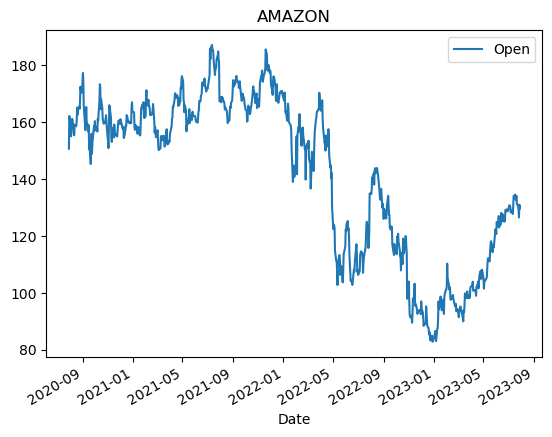

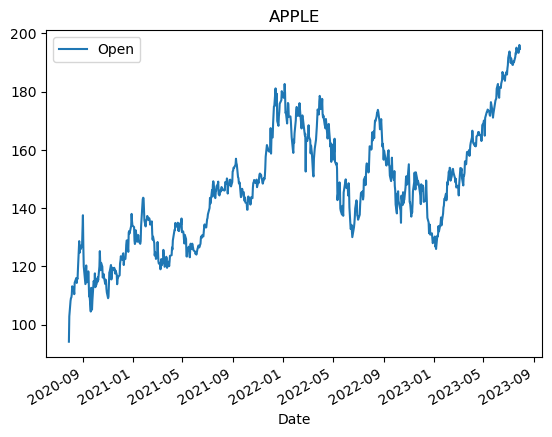

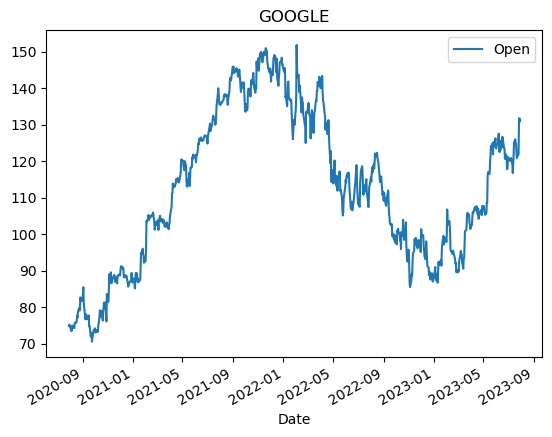

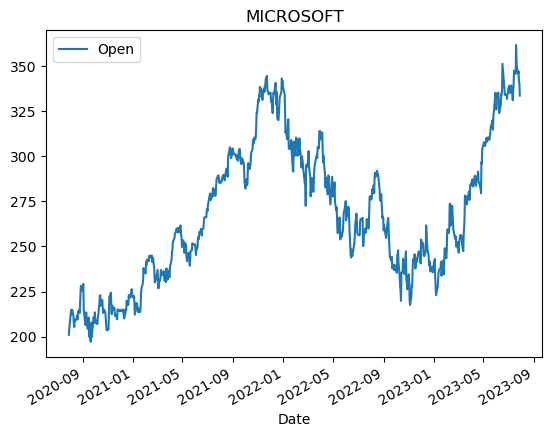

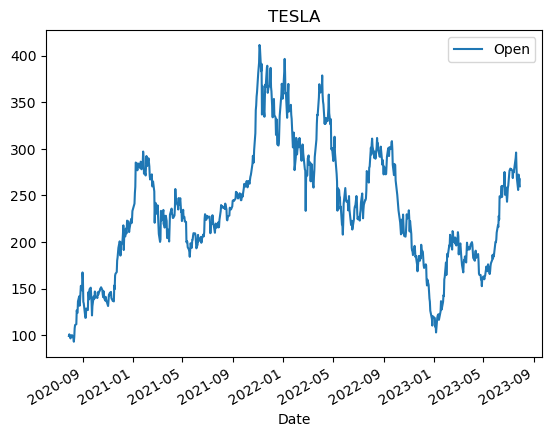

In [37]:
Amazon.plot(title="AMAZON")
Apple.plot(title="APPLE")
Google.plot(title="GOOGLE")
Microsoft.plot(title="MICROSOFT")
Tesla.plot(title="TESLA")